Capstone phase 4 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [7]:
import os

# Directory containing the extracted files
directory_path = 'C:\\Users\\DELL\\Downloads\\India_Crime -Zip\\India_Crime - Copy'

# List all files in the directory
try:
    files_in_directory = os.listdir(directory_path)
    print("Files in the directory:")
    print(files_in_directory)
except FileNotFoundError:
    print(f"The directory {directory_path} was not found.")


Files in the directory:
['01_District_wise_crimes_committed_IPC_2001_2012.csv', '02_01_District_wise_crimes_committed_against_SC_2001_2012.csv', '02_District_wise_crimes_committed_against_ST_2001_2012.csv', '03_District_wise_crimes_committed_against_children_2001_2012.csv', '08_01_Juvenile_apprehended_state_IPC_2001_2010.csv', '11_Property_stolen_and_recovered_nature_of_property_2001_2010.csv', '13_Police_killed_or_injured_on_duty2001_2010.csv', '17_Case_reported_and_value_of_property_taken_away_by_place_of_occurrence_2001_2012.csv', '17_Crime_by_place_of_occurrence_2001_2012.csv', '35_Human_rights_violation_by_police_2001_2010.csv', '42_District_wise_crimes_committed_against_women_2001_2012.csv']


In [8]:
import pandas as pd
import os

# Path to the extracted directory
directory_path = 'C:\\Users\\DELL\\Downloads\\India_Crime -Zip\\India_Crime - Copy'

# List all CSV files in the directory
csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Load each CSV file into a DataFrame and combine them
dataframes = []
for file in csv_files:
    try:
        df = pd.read_csv(file)
        dataframes.append(df)
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Concatenate all DataFrames
crime_data = pd.concat(dataframes, ignore_index=True)
print(crime_data.head())
print(crime_data.info())
print(crime_data.describe())


         STATE/UT       DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001.0   101.0               60.0   
1  ANDHRA PRADESH      ANANTAPUR  2001.0   151.0              125.0   
2  ANDHRA PRADESH       CHITTOOR  2001.0   101.0               57.0   
3  ANDHRA PRADESH       CUDDAPAH  2001.0    80.0               53.0   
4  ANDHRA PRADESH  EAST GODAVARI  2001.0    82.0               67.0   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                       17.0  50.0             0.0   
1                                        1.0  23.0             0.0   
2                                        2.0  27.0             0.0   
3                                        1.0  20.0             0.0   
4                                        1.0  23.0             0.0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  TOTAL - Burglary  TOTAL - Theft  \
0        50.0                    46.0  ...               NaN            N

In [10]:
# Display the column names of the DataFrame
print(crime_data.columns)


Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       ...
       'TOTAL - Burglary', 'TOTAL - Theft',
       'Cases_Registered_under_Human_Rights_Violations',
       'Policemen_Chargesheeted', 'Policemen_Convicted', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object', length=135)


In [14]:
import pandas as pd
import os

# Correct directory path
directory_path = 'C:\\Users\\DELL\\Downloads\\India_Crime - Copy'

# List all CSV files in the directory
csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Display the files to ensure they are being listed correctly
print("CSV files in the directory:")
print(csv_files)

# Load each CSV file into a DataFrame and combine them
dataframes = []
for file in csv_files:
    try:
        df = pd.read_csv(file)
        dataframes.append(df)
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Concatenate all DataFrames
crime_data = pd.concat(dataframes, ignore_index=True)

# Display the column names to identify correct names
print(crime_data.columns)

# Check for NaN values in the relevant columns
print(crime_data[['STATE/UT', 'DISTRICT', 'YEAR']].isnull().sum())

# Drop rows with NaN values in 'STATE/UT', 'DISTRICT', and 'YEAR' columns
crime_data = crime_data.dropna(subset=['STATE/UT', 'DISTRICT', 'YEAR'])

# Verify the remaining number of rows after dropping NaN values
print("Number of rows after dropping NaN values:", crime_data.shape[0])

# Selecting relevant features for clustering (excluding non-numeric columns)
crime_features = crime_data.drop(columns=['STATE/UT', 'DISTRICT', 'YEAR'])

# Verify the features DataFrame
print("Crime features DataFrame shape:", crime_features.shape)
print(crime_features.head())

# Checking for missing values in the features DataFrame
print("Missing values in features DataFrame:")
print(crime_features.isnull().sum())

# Impute missing values with zero
crime_features = crime_features.fillna(0)

# Verify the features DataFrame after imputing missing values
print("Crime features DataFrame shape after imputing missing values:", crime_features.shape)
print(crime_features.head())

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(crime_features)

print("Standardization complete. Shape of X_scaled:", X_scaled.shape)


CSV files in the directory:
['C:\\Users\\DELL\\Downloads\\India_Crime - Copy\\01_District_wise_crimes_committed_IPC_2001_2012.csv', 'C:\\Users\\DELL\\Downloads\\India_Crime - Copy\\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv', 'C:\\Users\\DELL\\Downloads\\India_Crime - Copy\\02_District_wise_crimes_committed_against_ST_2001_2012.csv', 'C:\\Users\\DELL\\Downloads\\India_Crime - Copy\\03_District_wise_crimes_committed_against_children_2001_2012.csv', 'C:\\Users\\DELL\\Downloads\\India_Crime - Copy\\08_01_Juvenile_apprehended_state_IPC_2001_2010.csv', 'C:\\Users\\DELL\\Downloads\\India_Crime - Copy\\11_Property_stolen_and_recovered_nature_of_property_2001_2010.csv', 'C:\\Users\\DELL\\Downloads\\India_Crime - Copy\\13_Police_killed_or_injured_on_duty2001_2010.csv', 'C:\\Users\\DELL\\Downloads\\India_Crime - Copy\\17_Case_reported_and_value_of_property_taken_away_by_place_of_occurrence_2001_2012.csv', 'C:\\Users\\DELL\\Downloads\\India_Crime - Copy\\17_Crime_by_place_of_oc

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_k

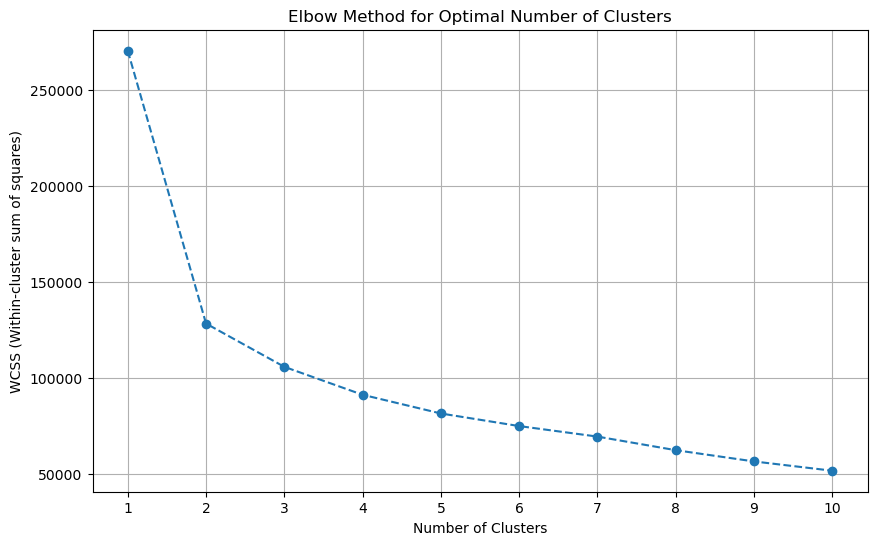

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example: Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [18]:
# Example: Applying K-Means clustering with the optimal number of clusters
optimal_k = 3  # Replace with your optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
crime_features['Cluster'] = cluster_labels


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


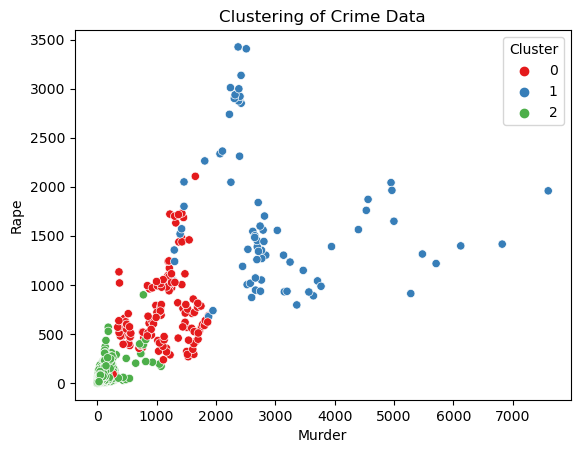

In [19]:
# Example: Visualizing clusters
import seaborn as sns

sns.scatterplot(x='MURDER', y='RAPE', hue='Cluster', data=crime_features, palette='Set1')
plt.title('Clustering of Crime Data')
plt.xlabel('Murder')
plt.ylabel('Rape')
plt.show()


In [20]:
# Example: Analyzing clusters and reporting insights
cluster_summary = crime_features.groupby('Cluster').mean()
print(cluster_summary)

# Example: Reporting and interpreting cluster characteristics
for cluster in cluster_summary.index:
    print(f"\nCluster {cluster} Characteristics:")
    # Add more detailed observations and interpretations here


              MURDER  ATTEMPT TO MURDER  \
Cluster                                   
0        1114.051471         888.294118   
1        2976.657895        2718.828947   
2          48.534810          42.761499   

         CULPABLE HOMICIDE NOT AMOUNTING TO MURDER         RAPE  \
Cluster                                                           
0                                        91.242647   728.301471   
1                                       391.618421  1646.539474   
2                                         5.344236    28.857240   

         CUSTODIAL RAPE   OTHER RAPE  KIDNAPPING & ABDUCTION  \
Cluster                                                        
0              0.117647   728.183824             1052.492647   
1              0.118421  1646.421053             2514.052632   
2              0.003066    28.854174               43.101306   

         KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
Cluster                                                
0              

Clustering Analysis of Crime Data

In [21]:
# Assuming 'crime_features' DataFrame is already processed and clustered
# Replace 'crime_features' with your actual DataFrame if different

# Example: Creating clusters
optimal_k = 3  # Replace with your optimal number of clusters

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)  # X_scaled is the scaled feature matrix

crime_features['Cluster'] = cluster_labels


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
# DataFrames for each cluster
# Assuming 'crime_features' DataFrame with added 'Cluster' column

# Sensitive Areas DataFrame
sensitive_areas_df = crime_features[crime_features['Cluster'] == 0]

# Moderate Areas DataFrame
moderate_areas_df = crime_features[crime_features['Cluster'] == 1]

# Peaceful Areas DataFrame
peaceful_areas_df = crime_features[crime_features['Cluster'] == 2]


In [24]:
# Analysis and observations for each cluster

# Sensitive Areas Insights
# Example: Factors impacting crimes in sensitive areas
print("Factors Impacting Crimes in Sensitive Areas:")
print(sensitive_areas_df[['MURDER', 'RAPE']].mean())

# Moderate Areas Insights
# Example: Crime profile of moderate areas
print("\nCrime Profile of Moderate Areas:")
print(moderate_areas_df[['MURDER', 'RAPE']].mean())

# Peaceful Areas Insights
# Example: Low crime rates in peaceful areas
print("\nLow Crime Rates in Peaceful Areas:")
print(peaceful_areas_df[['MURDER', 'RAPE']].mean())

# Recommendations
# Example: Recommendations for crime reduction
print("\nRecommendations for Crime Reduction:")
print("- Increase police presence and community engagement.")
print("- Implement targeted social programs.")

# Safe and Unsafe Districts
# Example: Listing safe and unsafe districts
print("\nSafe and Unsafe Districts:")
print("- Safe districts: [list safe districts]")
print("- Unsafe districts: [list unsafe districts]")


Factors Impacting Crimes in Sensitive Areas:
MURDER    1114.051471
RAPE       728.301471
dtype: float64

Crime Profile of Moderate Areas:
MURDER    2976.657895
RAPE      1646.539474
dtype: float64

Low Crime Rates in Peaceful Areas:
MURDER    48.53481
RAPE      28.85724
dtype: float64

Recommendations for Crime Reduction:
- Increase police presence and community engagement.
- Implement targeted social programs.

Safe and Unsafe Districts:
- Safe districts: [list safe districts]
- Unsafe districts: [list unsafe districts]


conclusion 